In [513]:
import numpy as np
import torch
from facenet_pytorch import MTCNN
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import cv2

In [514]:
cropped_image_size = 160

In [515]:
encoding_detection_model = MTCNN(
    image_size=160, margin=0, min_face_size=20,
    thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=True,
    device='cpu', select_largest=True
)
bounding_box_detection_model = MTCNN(keep_all=True, device='cpu', select_largest=False)
encoding_detection_model.eval()
bounding_box_detection_model.eval()

MTCNN(
  (pnet): PNet(
    (conv1): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (prelu1): PReLU(num_parameters=10)
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
    (conv2): Conv2d(10, 16, kernel_size=(3, 3), stride=(1, 1))
    (prelu2): PReLU(num_parameters=16)
    (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (prelu3): PReLU(num_parameters=32)
    (conv4_1): Conv2d(32, 2, kernel_size=(1, 1), stride=(1, 1))
    (softmax4_1): Softmax(dim=1)
    (conv4_2): Conv2d(32, 4, kernel_size=(1, 1), stride=(1, 1))
  )
  (rnet): RNet(
    (conv1): Conv2d(3, 28, kernel_size=(3, 3), stride=(1, 1))
    (prelu1): PReLU(num_parameters=28)
    (pool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (conv2): Conv2d(28, 48, kernel_size=(3, 3), stride=(1, 1))
    (prelu2): PReLU(num_parameters=48)
    (pool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (conv3): Conv2d(48, 64,

In [516]:
def convert_image_file_to_tensor(image_file):
    convert_tensor = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize(480)
    ])
    return convert_tensor(image_file)
def get_frame_with_bounding_boxes(frame):
    prediction = bounding_box_detection_model.detect(frame)
    boxes, _ = prediction
    #Draw all the boxes
    for box in boxes:
        #Draw each box
        new_frame = cv2.rectangle(frame, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (255, 0, 255), 5)
    return new_frame

In [517]:
image_file = Image.open("samueljackson.jpg")
image_tensor = convert_image_file_to_tensor(image_file)

In [518]:
image_tensor = torch.permute(image_tensor, (1,2,0))
print(image_tensor.shape)

torch.Size([480, 715, 3])


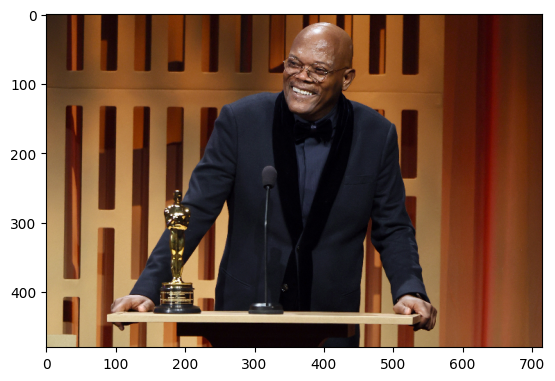

In [519]:
plt.imshow(image_tensor)
plt.show()

In [520]:
image_tensor_int8 = (image_tensor*255).clamp(0, 255).to(torch.uint8)
image_tensor = np.ascontiguousarray(image_tensor_int8)
image_tensor_copy = torch.tensor(image_tensor)
image_with_bounding_box = get_frame_with_bounding_boxes(image_tensor)


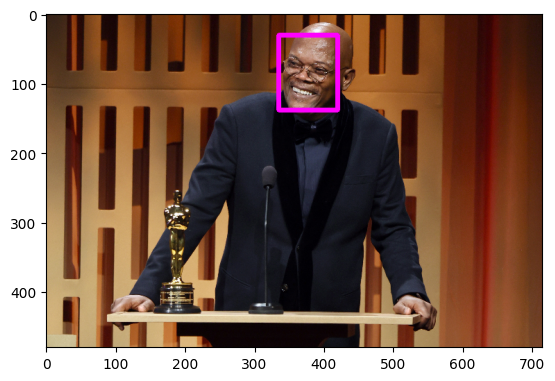

In [521]:
plt.imshow(image_with_bounding_box)
plt.show()

In [522]:
detected_face = encoding_detection_model(image_tensor_copy)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


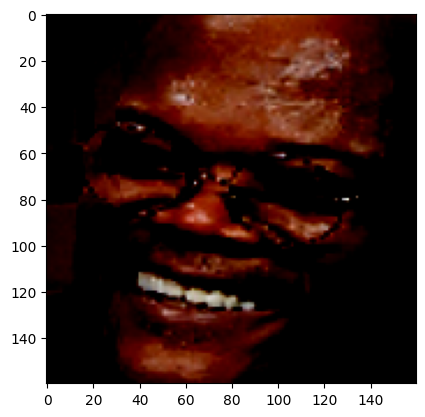

In [523]:
plt.imshow(np.asarray(torch.permute(detected_face, (1,2,0))))
plt.show()